In [1]:
import pandas as pd
import numpy as np

# data

In [236]:
from sklearn.datasets import make_blobs

centers = [(2, 2), (5, 5)]
cluster_std = [3, 1]

X, y = make_blobs(n_samples=1000, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

In [237]:
# X = np.random.random(size=(1000, 2)) * 10
# y = (5 + (np.array([2, 6]) * X).sum(axis=1) + np.random.normal(loc=0, scale=0.1)) > 40
# y = y.astype(int)

# add bias term
X = np.hstack([np.ones((1000,1)), X])
(X.shape, y.shape)

((1000, 3), (1000,))

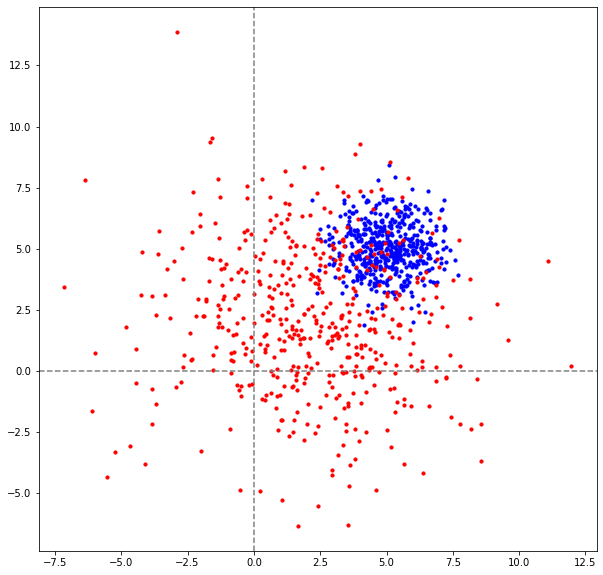

In [238]:
plt.figure(figsize=(10,10))
plt.axvline(0, c='grey', ls='--')
plt.axhline(0, c='grey', ls='--')
plt.scatter(X[y == 1, 1], X[y == 1, 2], color="blue", s=10, label="Cluster2")
plt.scatter(X[y == 0, 1], X[y == 0, 2], color="red", s=10, label="Cluster1")

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

# gradient descent

In [ ]:
w = np.random.random((3,))
alpha = 0.0001

for idx in range(50000):
    y_hat = 1 / (1 + np.exp(-1 * X_train @ w))
    
    dL_dy = - 1 * (y_train / y_hat) + (1 - y_train)/(1 - y_hat)
    dL_dz = dL_dy * (y_hat * (1 - y_hat))
    dL_dw = dL_dz @ X_train
    
    loss = (y_train * np.log(1 + np.exp(-y_hat)) + (1 - y_train) * np.log(1 + np.exp(y_hat))).mean()
    if idx % 10000 == 0:
        print(loss)
    
    # break
    w = w - alpha * dL_dw

0.7423616770612085
0.5951586940728341
0.5948345131153977


In [241]:
w

array([-6.04617286,  0.82506309,  0.70484331])

In [242]:
y_hat = 1 / (1 + np.exp(-1 * X_test @ w))

In [243]:
preds = (y_hat > 0.5).astype(int)
preds

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [244]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.8966666666666666

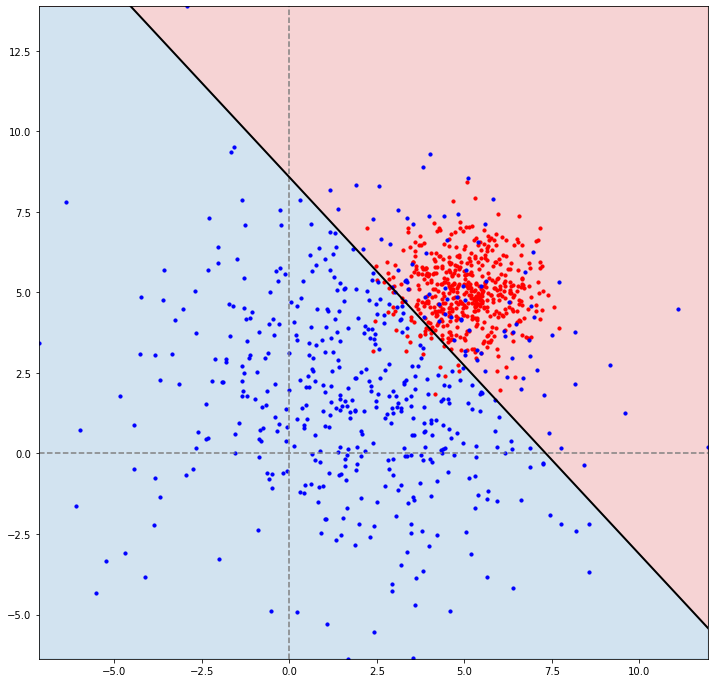

In [245]:
b, w1, w2 = w[0], w[1], w[2]
c = -b/w2
m = -w1/w2
xmin, xmax = np.min(X[:, 1]), np.max(X[:, 1])
ymin, ymax = np.min(X[:, 2]), np.max(X[:, 2])
xd = np.array([xmin, xmax])
yd = m*xd + c

plt.figure(figsize=(12,12))
plt.axvline(0, c='grey', ls='--')
plt.axhline(0, c='grey', ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:red', alpha=0.2)
plt.scatter(X[y == 1, 1], X[y == 1, 2], color="red", s=10, label="Cluster2")
plt.scatter(X[y == 0, 1], X[y == 0, 2], color="blue", s=10, label="Cluster1")
plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
plt.plot(xd, yd, 'k', lw=2)


# pytorch

In [246]:
import torch
import torch.nn as nn

class LogisticModel(nn.Module):
    def __init__(self, n_input):
        super(LogisticModel, self).__init__()
        self.weight = nn.Linear(n_input, 1, bias=False)
        
    def forward(self, x):
        x = self.weight(x)
        x = torch.sigmoid(x)
        return x

In [247]:
model = LogisticModel(3)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
for epoch in range(100000):
    optimizer.zero_grad()
    y_hat = model(torch.FloatTensor(X_train)).squeeze()
    t = torch.FloatTensor(y_train)
    loss = loss_fn(y_hat, t)
    loss.backward()
    optimizer.step()
    pass

In [248]:
loss

tensor(0.3459, grad_fn=<BinaryCrossEntropyBackward0>)

In [249]:
with torch.no_grad():
    preds = model(torch.FloatTensor(X_test))

In [250]:
preds = (preds > 0.5).int().numpy().reshape(-1)

In [251]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.8966666666666666

In [252]:
torch_w = list(model.named_parameters())[0][1].detach().numpy().reshape(-1)
torch_w

array([-6.0461726 ,  0.8250636 ,  0.70484376], dtype=float32)

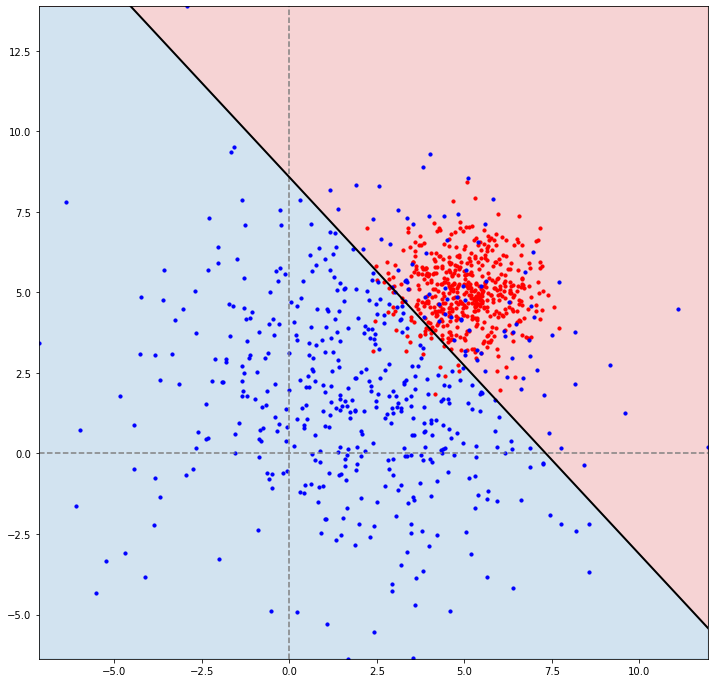

In [253]:
b, w1, w2 = torch_w[0], torch_w[1], torch_w[2]
c = -b/w2
m = -w1/w2
xmin, xmax = np.min(X[:, 1]), np.max(X[:, 1])
ymin, ymax = np.min(X[:, 2]), np.max(X[:, 2])
xd = np.array([xmin, xmax])
yd = m*xd + c

plt.figure(figsize=(12,12))
plt.axvline(0, c='grey', ls='--')
plt.axhline(0, c='grey', ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:red', alpha=0.2)
plt.scatter(X[y == 1, 1], X[y == 1, 2], color="red", s=10, label="Cluster2")
plt.scatter(X[y == 0, 1], X[y == 0, 2], color="blue", s=10, label="Cluster1")
plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
plt.plot(xd, yd, 'k', lw=2)
